In [21]:
from foobah.gcode import GCODE
from foobah.utils import preview_png
from foobah.methods import line_threshold
from foobah import constants
from foobah.constants import XMAX, XMIN, YMAX, YMIN

import PIL
import PIL.Image
import PIL.ImageFilter

import math
import numpy as np

import random
from random import uniform
from scipy.spatial import Delaunay, KDTree

from collections import defaultdict
from operator import itemgetter

from IPython.display import display

In [22]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.006
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

xs[0], ys[0], zs[0] = (0.1, 1.3, 1.05)


for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


x_ = xs
y_ = zs

x_min = min(x_)
x_max = max(x_)
y_min = min(y_)
y_max = max(y_)

margin = 1.2
x_margin = -(x_max - x_min) * (1.0 - margin)
y_margin = -(y_max - y_min) * (1.0 - margin)

x_min = x_min - x_margin
y_min = y_min - y_margin
x_max = x_max + x_margin
y_max = y_max + y_margin

points = list(zip(x_, y_))
scale = (x_min, x_max, y_min, y_max)
print(scale)

(-26.844173694531186, 28.434290986551694, -9.129903337471479, 61.15454912118639)


In [23]:
basename = "lorenz"

gcode = GCODE(basename, feedrate=3000, travel_feedrate=6000, scale=scale, max_line_length=5)
gcode.move_to_starting_position()
gcode.draw_boundaries()

gcode.pen_up()
gcode.move_to_mid_point()
gcode.travel_to(*points[0])

for x, y in points:
    gcode.line_to(x, y)

gcode.pen_up()
gcode.move_to_starting_position()
gcode.flush()

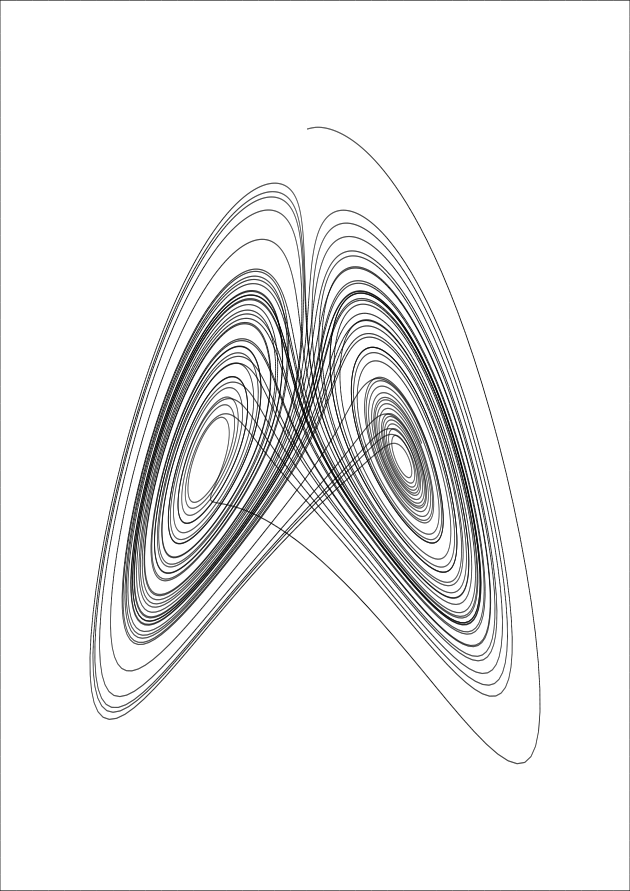

In [24]:
preview_png(basename, scale=3)